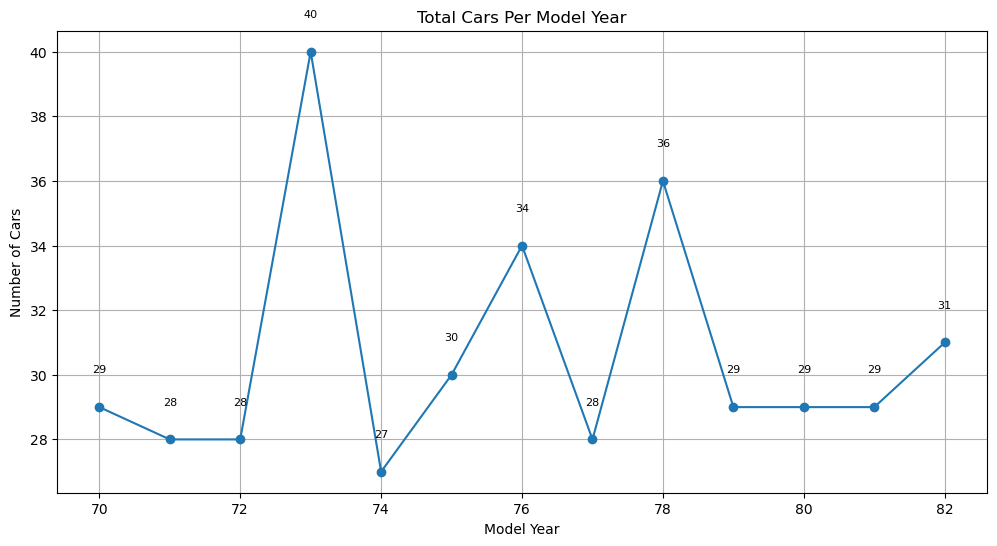

In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Total Cars per Model Year
data = pd.read_csv("Automobile.csv")

# Group by year model and count the number of cars
cars_per_year = data['model_year'].value_counts().sort_index()

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(cars_per_year.index, cars_per_year.values, marker='o')
plt.title('Total Cars Per Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.grid(True)

# Add Label
for x, y in zip(cars_per_year.index, cars_per_year.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=8)
    
plt.show()

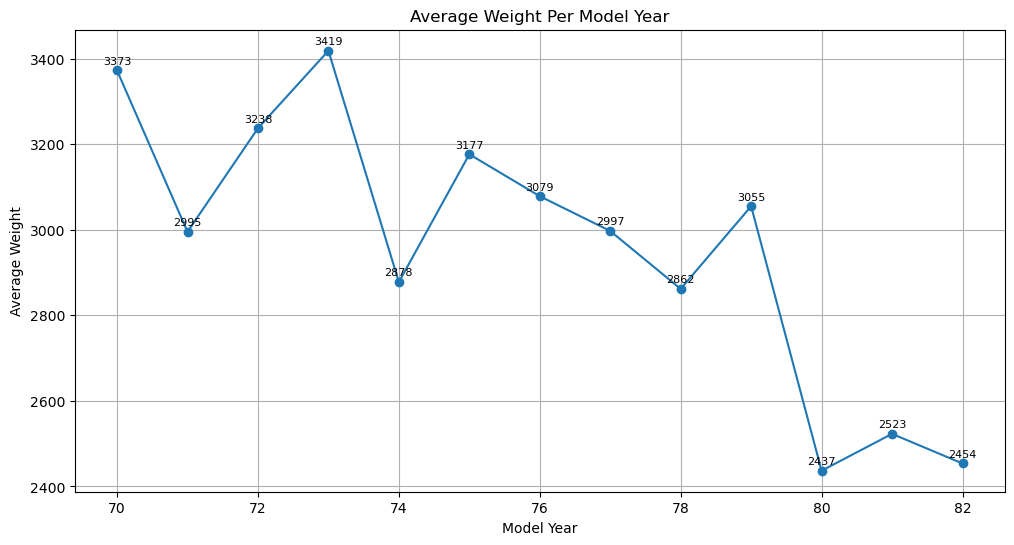

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Average Weight per Model Year
data = pd.read_csv("Automobile.csv")

data['weight'] = pd.to_numeric(data['weight'], errors='coerce')
data = data.dropna(subset=['model_year', 'weight'])

# Group by year model and calculate average weight
avg_weight_per_year = data.groupby('model_year')['weight'].mean().sort_index()

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(avg_weight_per_year.index, avg_weight_per_year.values, marker='o')
plt.title('Average Weight Per Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.grid(True)
# Add Label
for x, y in zip(avg_weight_per_year.index, avg_weight_per_year.values):
    plt.text(x, y + 10, f"{y:.0f}", ha='center', va='bottom', fontsize=8)
plt.show()

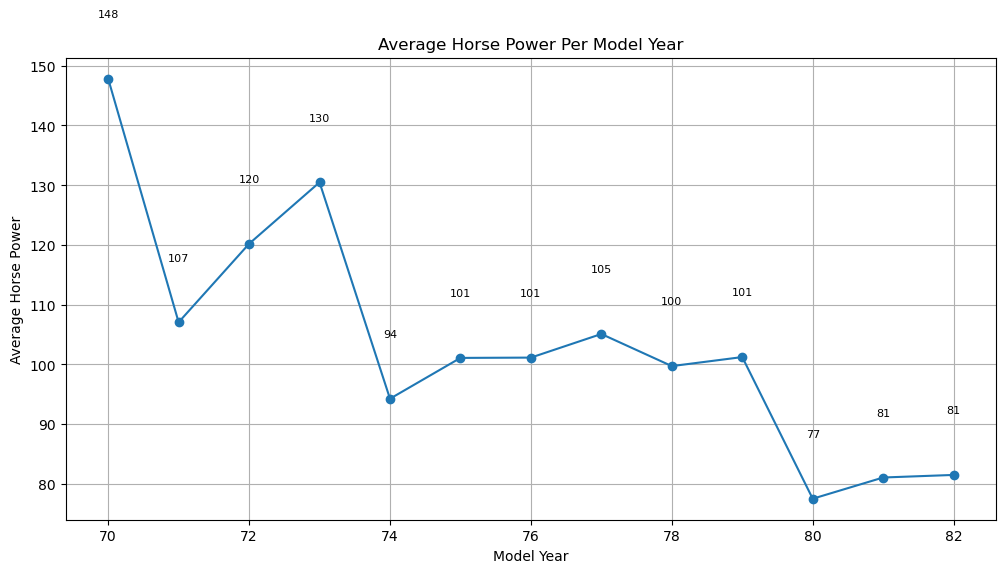

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Average HorsePower per Model Year
data = pd.read_csv("Automobile.csv")

data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data = data.dropna(subset=['model_year', 'horsepower'])

# Group by year model and calculate average horse power
avg_hp_per_year = data.groupby('model_year')['horsepower'].mean().sort_index()

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(avg_hp_per_year.index, avg_hp_per_year.values, marker='o')
plt.title('Average Horse Power Per Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Horse Power')
plt.grid(True)
# Add Label
for x, y in zip(avg_hp_per_year.index, avg_hp_per_year.values):
    plt.text(x, y + 10, f"{y:.0f}", ha='center', va='bottom', fontsize=8)
plt.show()

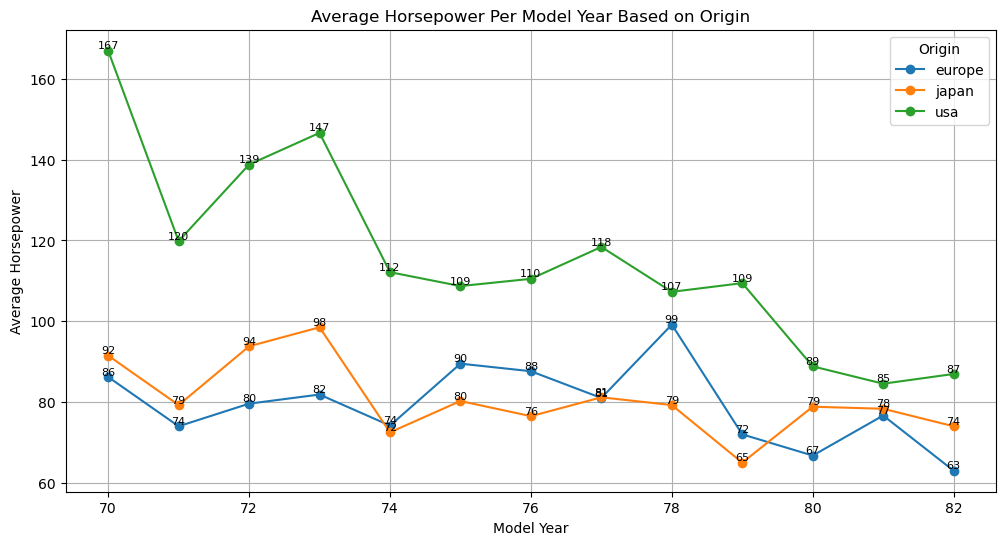

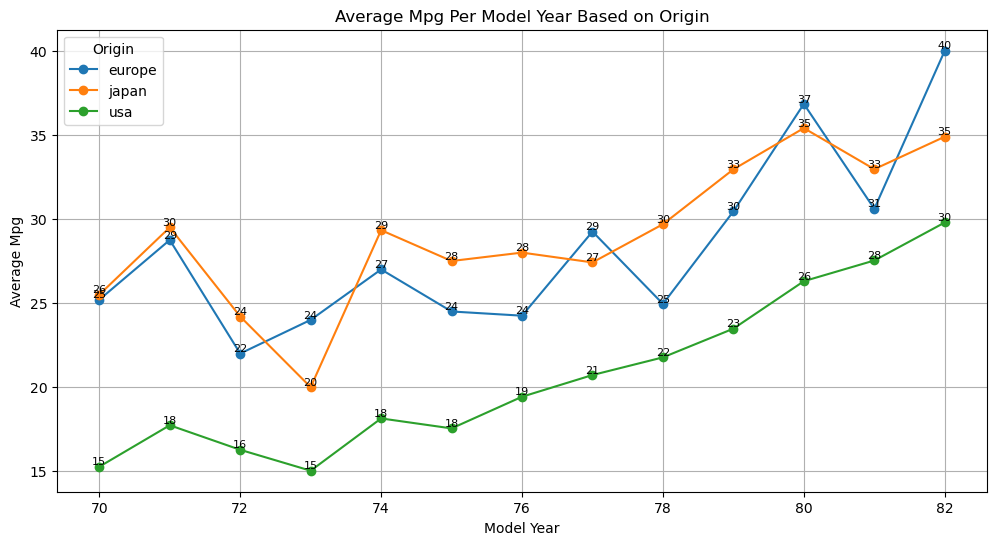

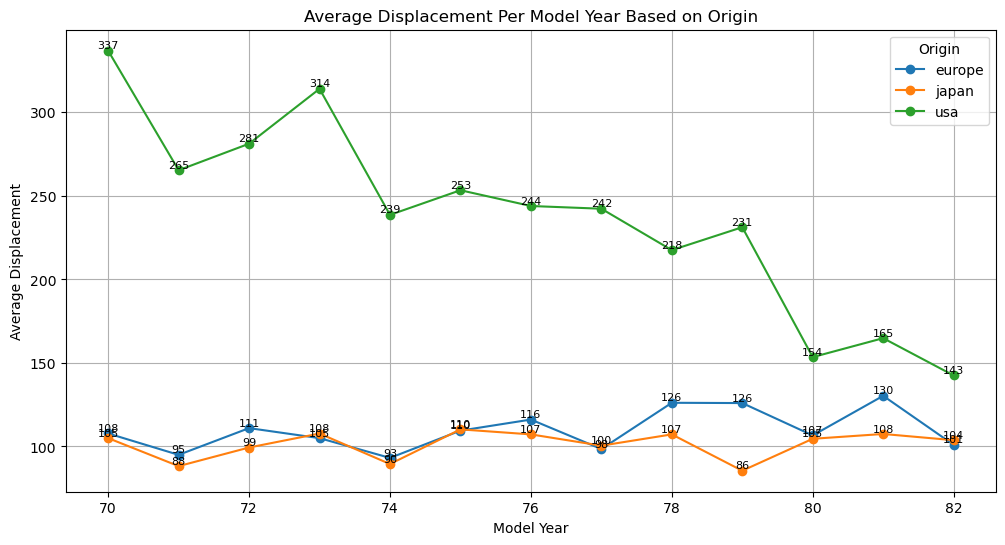

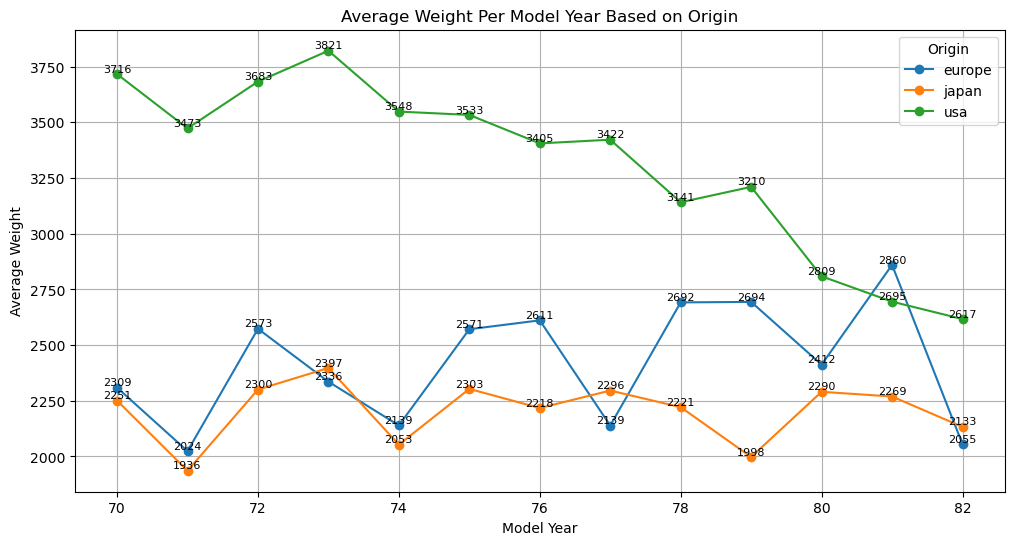

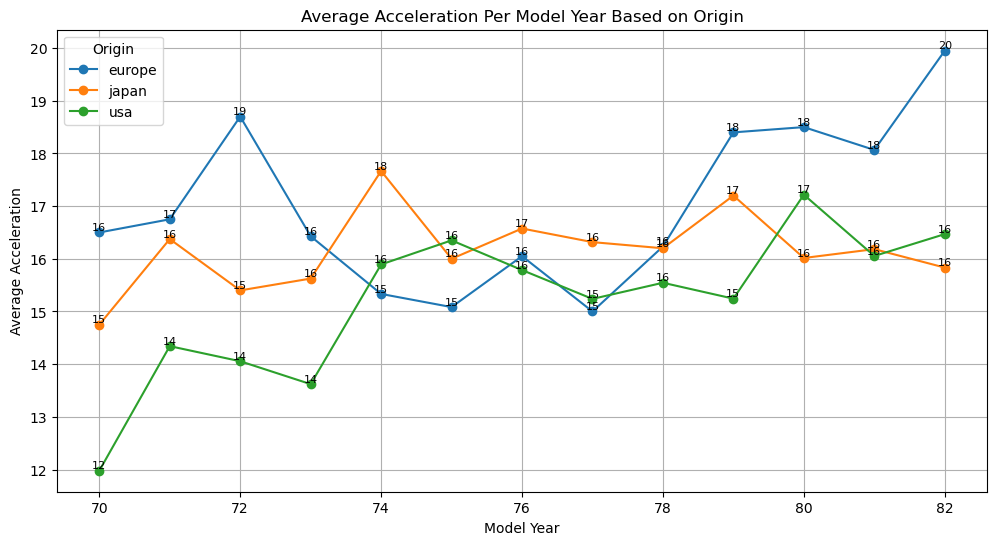

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Comparison Average per Context in Every Model Year Based And Origin
data = pd.read_csv("Automobile.csv")

# Metrics to analyze
metrics = ['horsepower', 'mpg', 'displacement', 'weight', 'acceleration']

# Convert metrics to numeric
for metric in metrics:
    data[metric] = pd.to_numeric(data[metric], errors='coerce')

# Drop missing values
data = data.dropna(subset=['model_year', 'origin'] + metrics)

# Loop through each metric
for metric in metrics:
    # Group by model year and origin, then calculate average
    avg_per_year_origin = (
        data.groupby(['model_year', 'origin'])[metric].mean().reset_index()
    )

    # Plot Line Chart (Multiple Lines by Origin)
    plt.figure(figsize=(12, 6))

    for origin in avg_per_year_origin['origin'].unique():
        origin_data = avg_per_year_origin[avg_per_year_origin['origin'] == origin]
        plt.plot(origin_data['model_year'], origin_data[metric], marker='o', label=origin)

    # Chart details
    plt.title(f'Average {metric.capitalize()} Per Model Year Based on Origin')
    plt.xlabel('Model Year')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.grid(True)
    plt.legend(title='Origin')

    # Add Label
    for _, row in avg_per_year_origin.iterrows():
        plt.text(
            row['model_year'], row[metric], f"{row[metric]:.0f}", ha='center', va='bottom', fontsize=8
        )
    plt.show()

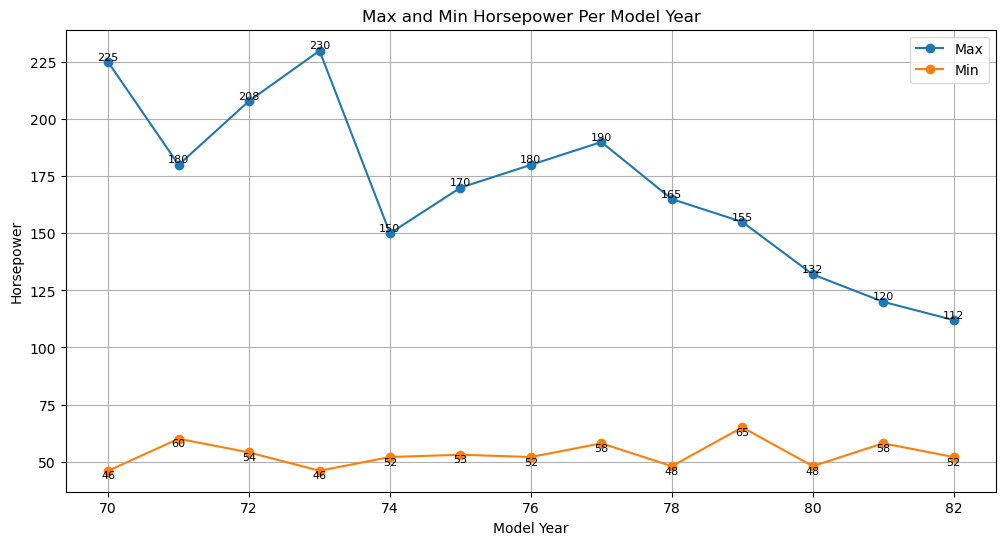

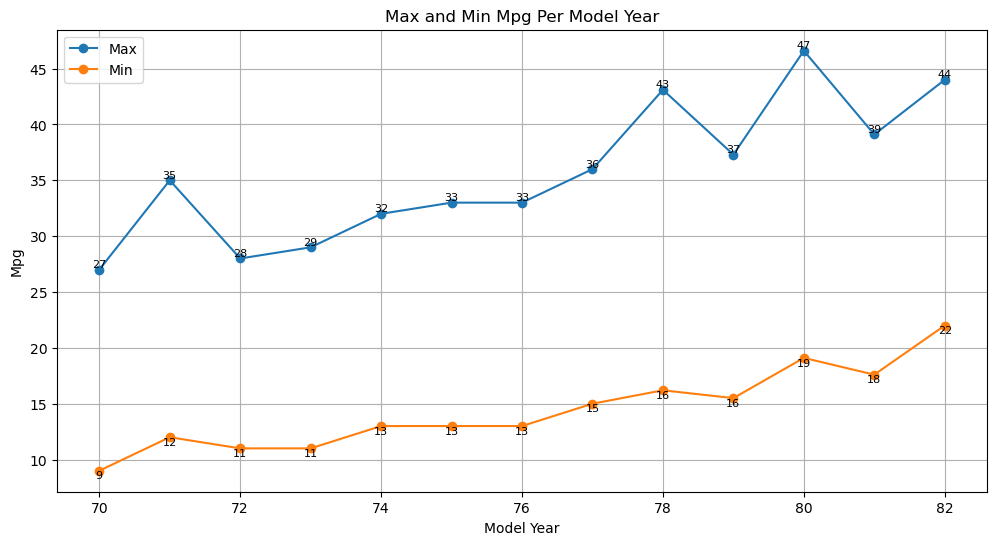

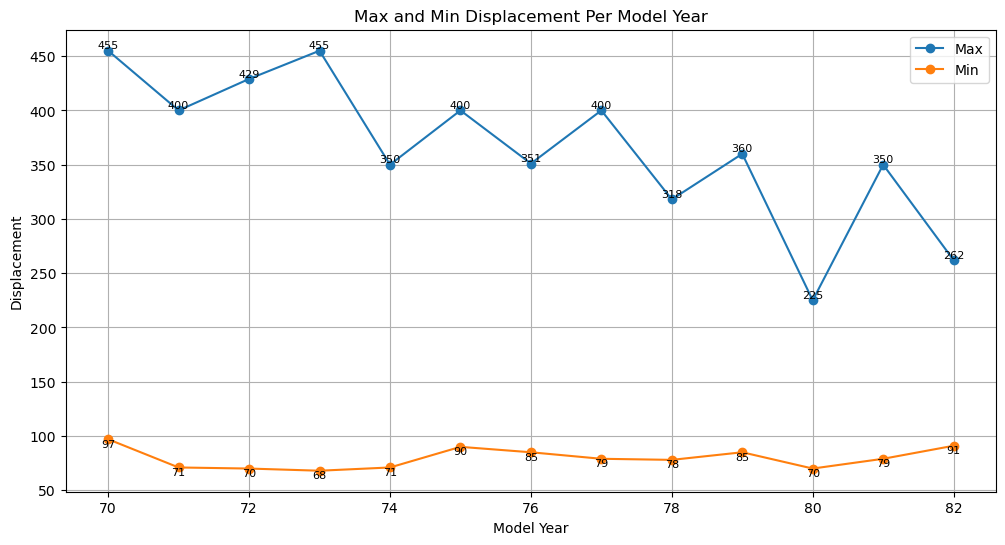

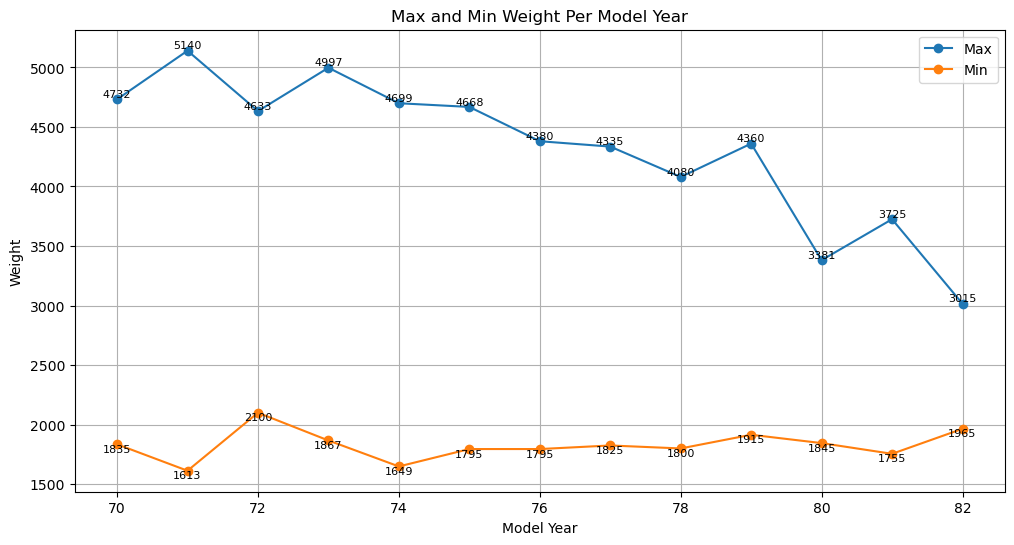

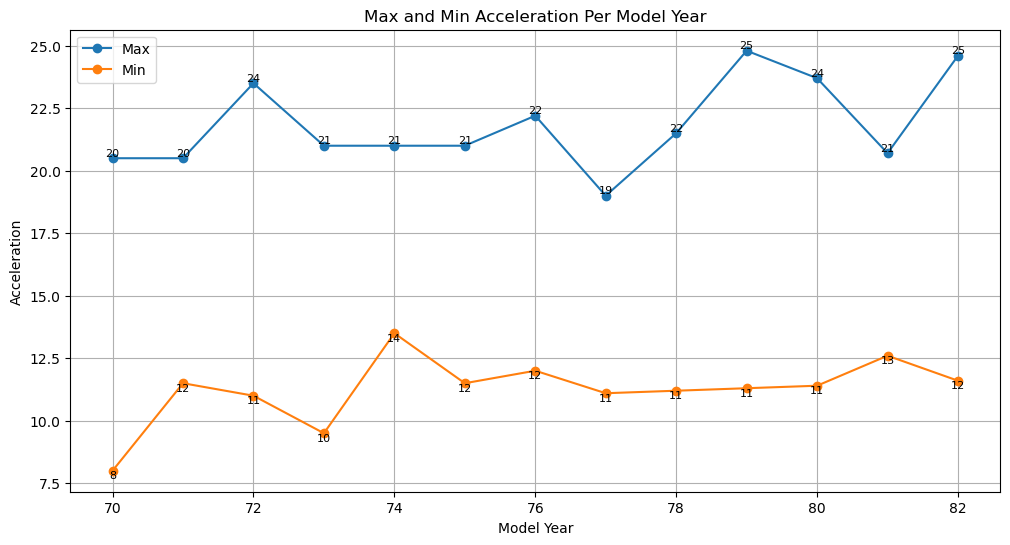

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Comparison Max and Min Context per Model Year
data = pd.read_csv("Automobile.csv")

# Metrics to analyze
metrics = ['horsepower', 'mpg', 'displacement', 'weight', 'acceleration']

# Convert metrics to numeric
for metric in metrics:
    data[metric] = pd.to_numeric(data[metric], errors='coerce')

# Drop missing values
data = data.dropna(subset=['model_year'] + metrics)

# Loop through each metric
for metric in metrics:
    # Group by model year
    stats_per_year = (
        data.groupby('model_year')[metric].agg(['min', 'max']).reset_index()
    )

    # Plot Line Chart
    plt.figure(figsize=(12, 6))
    plt.plot(
        stats_per_year['model_year'], stats_per_year['max'], marker='o', label='Max'
    )
    plt.plot(
        stats_per_year['model_year'], stats_per_year['min'], marker='o', label='Min'
    )
    plt.title(f'Max and Min {metric.capitalize()} Per Model Year')
    plt.xlabel('Model Year')
    plt.ylabel(f'{metric.capitalize()}')
    plt.grid(True)
    plt.legend()

    # Add Label
    for _, row in stats_per_year.iterrows():
        plt.text(
            row['model_year'], row['max'], f"{row['max']:.0f}", ha='center', va='bottom', fontsize=8
        )
        plt.text(
            row['model_year'], row['min'], f"{row['min']:.0f}", ha='center', va='top', fontsize=8
        )

    plt.show()